<a href="https://colab.research.google.com/github/OksanaBazhina/HSE_project/blob/main/%D0%98%D0%B7%D1%80%D0%B0%D0%B7%D1%86%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Изразцы из коллекции Пермского краеведческого музея

В фондах Пермского краеведческого музея хранится большое количество изразцов, они все разные, там также представлены элементы печей из разных городов края и даже периодов (XVII–XIX в).
1. Какие типы изразцов сохранились в коллекции музея?
2. Что общего между изразцами?
3. Чем они отличаются?

# Импортируем все необходимые библиотеки:

* Pandas
* Matplotlib
* Seaborn
* Sklearn

In [1]:
# все импорты
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import preprocessing, metrics
from sklearn.cluster import KMeans

# Кластеризация

Кластерный анализ использутся, когда мы хотим найти схожие объекты в наших данных

* Кластерный анализ разбивает набор объектов на группы

* Попутно определяется число групп

Алгоритмов существует больше, мы посмотрим 3 основных:

* иерархический кластерный анализ: заранее неизвестно число кластеров (групп, на которые разбивается набор объектов) - будем смотреть по локтевой диаграмме и дендрограмме

* k-means: нужно определить и указать оптимальное количество кластеров да начала работы алгоритма


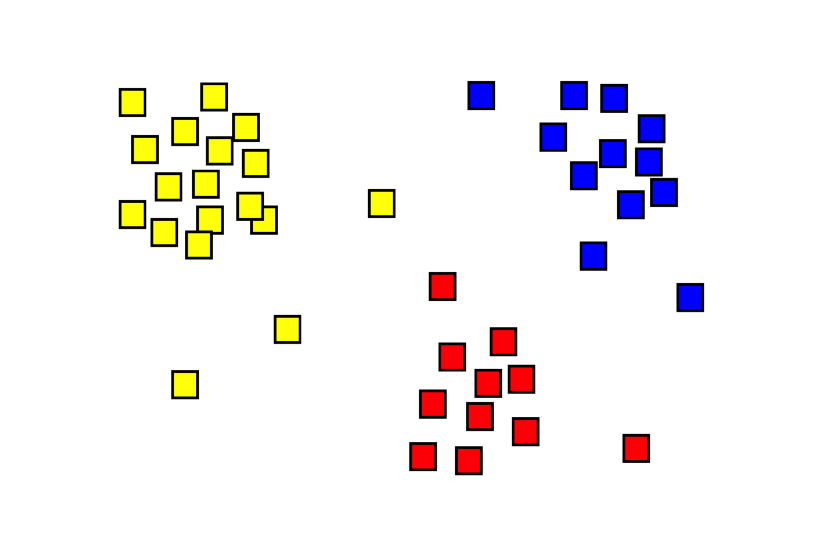

### Как читать и строить дендрограммы

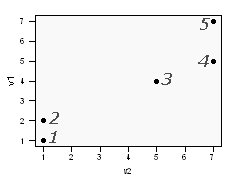

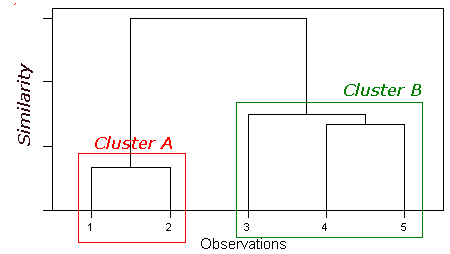

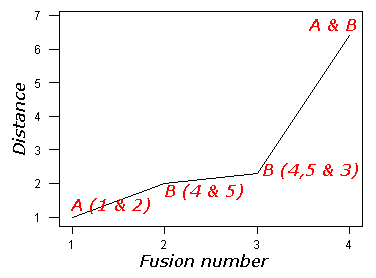

### Когда остановиться:

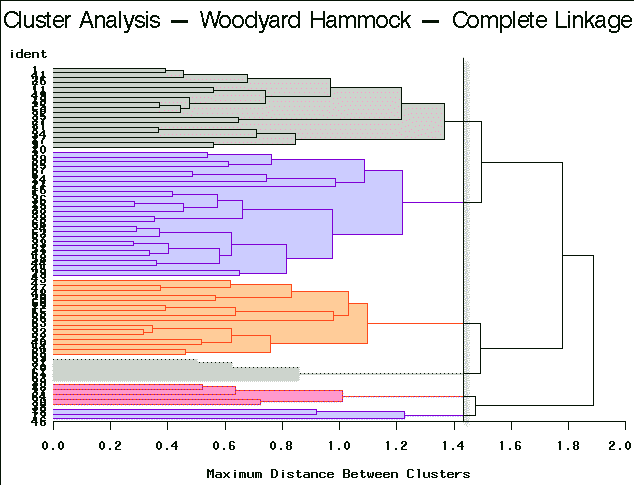

### Расстояние между кластерами

* **Среднее невзвешенное расстояние (Average linkage clustering) - для плотных облачков точек**
* Центроидный метод (Centroid Method)
* Метод дальнего соседа, максимального расстояния (Complete linkage clustering)
* **Метод ближайшего соседа (Single linkage clustering) - для кластеров в виде линий**
* **Метод Варда (Ward's method)**

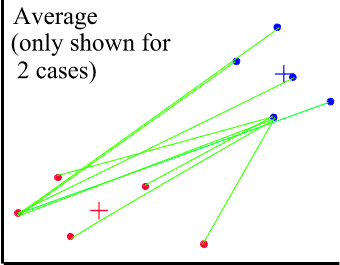

Для плотных облачков точек пододит Среднее невзвешенное расстояние, Вард

Для линий - Метод ближайшего соседа

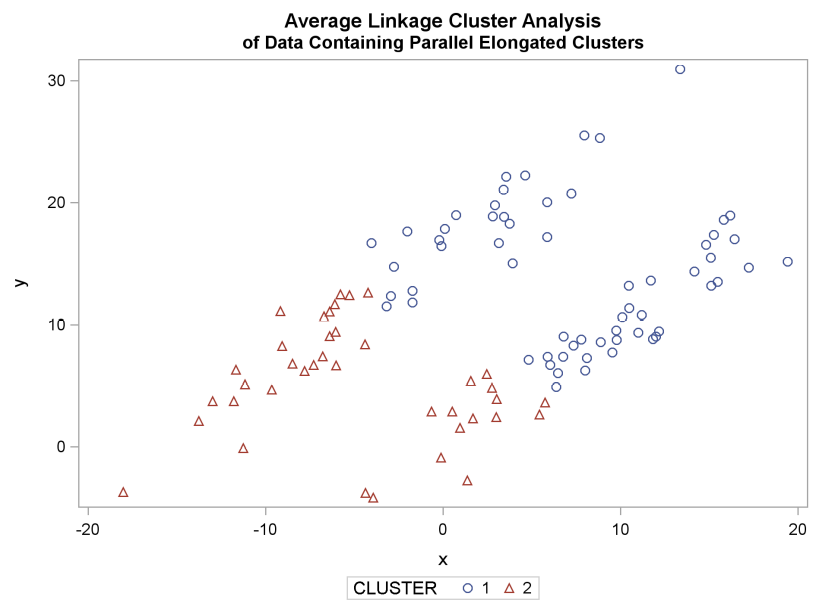

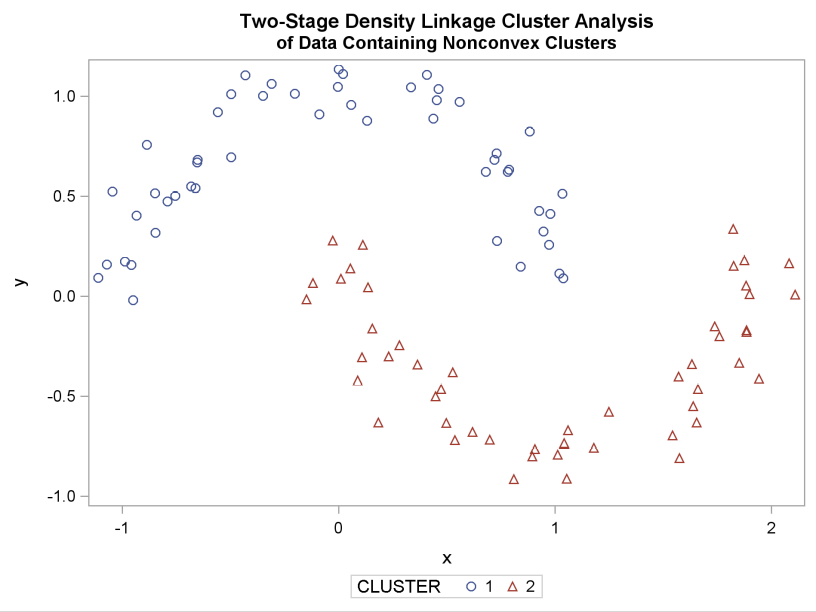

## Кластерный анализ :
# Загружаем файл с нашим датасетом - Изразцы.csv
В датасете собрана информация по 22 изразцам
# Были выделены следующие признаки:
* Тип изразца: Поясной/Сюжетный
* Тип крепления изразца: Румпа коробчатая/Румпа отспупная
* Тип рисунка на изразце: Животоные/Люди/Здание/Лес/Узор
* Выделен признак - Мастер

In [9]:
df = pd.read_csv("Изразцы.csv")
df=df[['Поясной', 'Сюжетный', 'Румпа коробчатая', 'Румпа отспупная',
       'Животоные', 'Люди', 'Здание', 'Лес', 'Узор', 'Мастер']]
df

,Поясной,Сюжетный,Румпа коробчатая,Румпа отспупная,Животоные,Люди,Здание,Лес,Узор,Мастер
0,1,1,0,1,0,0,1,0,0,0
1,1,1,0,1,1,0,0,0,0,0
2,0,1,0,1,0,1,0,1,0,0
3,0,1,1,0,0,1,0,1,0,0
4,1,0,1,0,0,0,0,0,1,0
5,1,0,1,0,0,0,0,0,0,0
6,1,1,0,1,0,0,1,0,0,0
7,1,1,0,1,1,0,0,0,0,0
8,0,1,0,1,1,0,0,1,0,0
9,1,1,0,1,0,0,1,0,0,0


Строим дендограмму, посмотрим сколько кластеров она нам покажет:

Спойлер: 4 кластера.

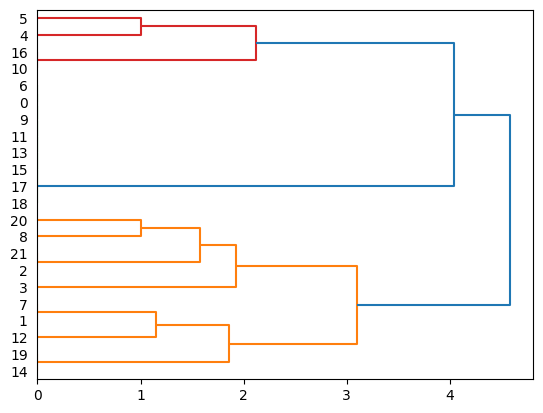

In [10]:
link = linkage(df, 'ward', 'euclidean')
dn = dendrogram(link, orientation = "right")

Проверим с помощью графика "каменистая осыпь" сколько кластеров она предложит нам выделить?

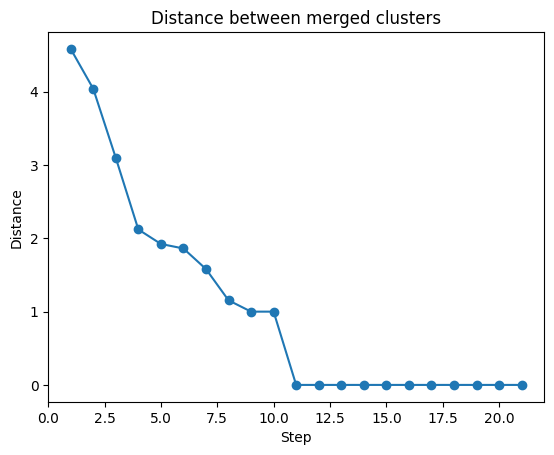

In [11]:
dist = link[:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)

plt.title('Distance between merged clusters')
plt.plot(idxs, dist_rev, marker='o')
plt.xlabel('Step')
plt.ylabel('Distance');

In [18]:
# Останавливаем объединение, выделим 4 кластера

df['cluster'] = fcluster(link, 4, criterion='maxclust')
df

,Поясной,Сюжетный,Румпа коробчатая,Румпа отспупная,Животоные,Люди,Здание,Лес,Узор,Мастер,cluster
0,1,1,0,1,0,0,1,0,0,0,3
1,1,1,0,1,1,0,0,0,0,0,1
2,0,1,0,1,0,1,0,1,0,0,2
3,0,1,1,0,0,1,0,1,0,0,2
4,1,0,1,0,0,0,0,0,1,0,4
5,1,0,1,0,0,0,0,0,0,0,4
6,1,1,0,1,0,0,1,0,0,0,3
7,1,1,0,1,1,0,0,0,0,0,1
8,0,1,0,1,1,0,0,1,0,0,2
9,1,1,0,1,0,0,1,0,0,0,3


In [35]:
# Определяем частоту встречаемости признаков в каждом их 4-х выделенных кластеров:
df['cluster'].value_counts()

cluster
1    10
0     5
2     4
3     3
Name: count, dtype: int64

In [36]:
df.groupby('cluster').mean()
# Визуализируем и интерпретируем!

,Поясной,Сюжетный,Румпа коробчатая,Румпа отспупная,Животоные,Люди,Здание,Лес,Узор,Мастер
cluster,,,,,,,,,,
0,0.6,1.0,0.000000,1.000000,0.6,0.2,0.0,1.0,0.00,0.0
1,1.0,1.0,0.000000,1.000000,0.2,0.0,0.8,0.0,0.00,0.0
2,1.0,0.0,0.500000,0.500000,0.0,0.0,0.0,0.0,0.75,0.0
3,0.0,1.0,0.333333,0.666667,0.0,1.0,0.0,1.0,0.00,0.0


## Метод k-means

В scikit-learn процедура настройки и использования моделей часто проходит по одной и той же схеме:

* Инициализация модели, задание её параметров,

* Подгонка модели (метод fit и/или fit_transform),

* Предсказание для новых наблюдений (метод predict).

Для кластеризации методом k-means необходимо задать k наперёд. Попробуем k = 2.

In [21]:
df.head() #убераем столбец с кластером, полученным прошлым способом

,Поясной,Сюжетный,Румпа коробчатая,Румпа отспупная,Животоные,Люди,Здание,Лес,Узор,Мастер,cluster
0,1,1,0,1,0,0,1,0,0,0,3
1,1,1,0,1,1,0,0,0,0,0,1
2,0,1,0,1,0,1,0,1,0,0,2
3,0,1,1,0,0,1,0,1,0,0,2
4,1,0,1,0,0,0,0,0,1,0,4


In [22]:
df.columns[:-1]

Index(['Поясной', 'Сюжетный', 'Румпа коробчатая', 'Румпа отспупная',
       'Животоные', 'Люди', 'Здание', 'Лес', 'Узор', 'Мастер'],
      dtype='object')

In [23]:
df = df[df.columns[:-1]]
df.head()

,Поясной,Сюжетный,Румпа коробчатая,Румпа отспупная,Животоные,Люди,Здание,Лес,Узор,Мастер
0,1,1,0,1,0,0,1,0,0,0
1,1,1,0,1,1,0,0,0,0,0
2,0,1,0,1,0,1,0,1,0,0
3,0,1,1,0,0,1,0,1,0,0
4,1,0,1,0,0,0,0,0,1,0


<ipython-input-24-0eed419e8417>:2: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  models = [KMeans(n_clusters=k, n_init='auto').fit(df) for k in K]
<ipython-input-24-0eed419e8417>:2: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  models = [KMeans(n_clusters=k, n_init='auto').fit(df) for k in K]
<ipython-input-24-0eed419e8417>:2: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  models = [KMeans(n_clusters=k, n_init='auto').fit(df) for k in K]


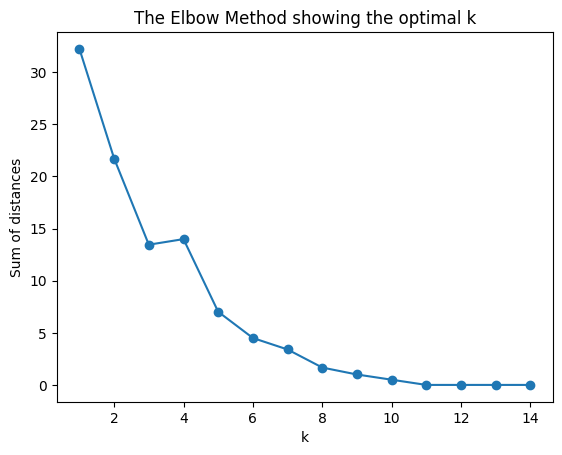

In [24]:
K = range(1, 15)
models = [KMeans(n_clusters=k, n_init='auto').fit(df) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow (Метод локтя - используем для определения количества кластеров в наборе данных)
# Метод состоит в построении графика объяснимого изменения в зависимости от количества кластеров и выборе изгиба кривой в качестве количества кластеров для использования.

plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k');

In [25]:
# Инициализация модели
model = KMeans(n_clusters=4, n_init='auto')
model.fit(df)

KMeans(n_clusters=4, n_init='auto')

In [29]:
# Результат кластеризации на данных df
df['cluster'] = model.labels_ # добавим номера кластеров в датафрейм

In [30]:
df

,Поясной,Сюжетный,Румпа коробчатая,Румпа отспупная,Животоные,Люди,Здание,Лес,Узор,Мастер,cluster
0,1,1,0,1,0,0,1,0,0,0,1
1,1,1,0,1,1,0,0,0,0,0,1
2,0,1,0,1,0,1,0,1,0,0,3
3,0,1,1,0,0,1,0,1,0,0,3
4,1,0,1,0,0,0,0,0,1,0,2
5,1,0,1,0,0,0,0,0,0,0,2
6,1,1,0,1,0,0,1,0,0,0,1
7,1,1,0,1,1,0,0,0,0,0,1
8,0,1,0,1,1,0,0,1,0,0,0
9,1,1,0,1,0,0,1,0,0,0,1


In [31]:
df.groupby('cluster').mean()

,Поясной,Сюжетный,Румпа коробчатая,Румпа отспупная,Животоные,Люди,Здание,Лес,Узор,Мастер
cluster,,,,,,,,,,
0,0.6,1.0,0.000000,1.000000,0.6,0.2,0.0,1.0,0.00,0.0
1,1.0,1.0,0.000000,1.000000,0.2,0.0,0.8,0.0,0.00,0.0
2,1.0,0.0,0.500000,0.500000,0.0,0.0,0.0,0.0,0.75,0.0
3,0.0,1.0,0.333333,0.666667,0.0,1.0,0.0,1.0,0.00,0.0


Результат примерно такой же!

### Метрики качества

* Ближе к +1: данная точка находится далеко от ближайших кластеров (к которым она не относится);
* Ближе к 0: точка находится около границы кластеров;
* Ближе к -1: точка ближе к объектам ближайших кластеров, чем к объектам своего.

Вторая метрика лучше отражает выбор количества образуемых кластеров ⚡

In [32]:
print(f"Silhouette Coefficient: {metrics.silhouette_score(df, fcluster(link, 4, criterion='maxclust')):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(df, model.labels_):.3f}")

Silhouette Coefficient: 0.493
Silhouette Coefficient: 0.591
